In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class SymmetrySubgroup:
    
    def __init__(self, n):
        self.n = n
        self.theta = (2*np.pi)/n
        c,s = np.cos(self.theta), np.sin(self.theta)
        self.r = np.array([[c, -s],[s, c]])
        self.origin = self.r @ np.array([1, 0])
        
    def generate_polygon(self):
        vertices = np.zeros((self.n, 2))
        x = np.array([1, 0])
        r = self.r
        for n in range(self.n):
            x = r @ x 
            vertices[n,:] = x
        return vertices
    
    def show_polygon(self, show = True):
        vertices = self.generate_polygon()
        vertices_aug = np.vstack([vertices, vertices[0,:]])
        x, y = vertices.T
        plt.plot(vertices_aug[:,0], vertices_aug[:,1])
        plt.scatter(x, y, s = 20, color = 'black')
        plt.xlim([-1.5, 1.5])
        plt.ylim([-1.5, 1.5])
        plt.gca().set_aspect('equal')
        if show:
            plt.show()
            plt.close()
        return vertices
    
    def convolve(self, f, k):
        raise NotImplementedError
        

class Cn(SymmetrySubgroup):
    
    def __init__(self,n):
        super(Cn, self).__init__(n = n)
        
    def convolve(self, f, k):
        assert len(f) == len(k), 'Filter dim must match function dim.'
        assert len(f) == self.n, 'Function must be defined at each vertex.'
        
        h = np.zeros(self.n)
        for g in range(self.n):
            gk = np.roll(k, g)
            h[g] = (f*gk).sum()
        return h
    
    def f_action(self,g,f):
        return np.roll(f, g)
    
    def check_equivariance(self,f,k):
        x, y = self.generate_polygon().T
        h = self.convolve(f,k)
        plt.subplot(121)
        plt.scatter(x, y, s = 50, c = f)
        plt.xlim([-1.5, 1.5])
        plt.ylim([-1.5, 1.5])
        plt.title('Function')
        plt.colorbar()
        plt.gca().set_aspect('equal')
        
        plt.subplot(122)
        plt.scatter(x, y, s = 50, c = h, cmap = 'coolwarm')
        plt.xlim([-1.5, 1.5])
        plt.ylim([-1.5, 1.5])
        plt.title('Covolution')
        plt.colorbar()
        plt.gca().set_aspect('equal')
        plt.tight_layout()
        plt.show()
        plt.close()
        
        for g in range(self.n):
            gf = self.f_action(g,f)
            hgf = self.convolve(gf,k)
            ghf = self.f_action(g,h)
            plt.subplot(131)
            plt.scatter(x, y, s = 50, c = gf)
            plt.xlim([-1.5, 1.5])
            plt.ylim([-1.5, 1.5])
            plt.title('Group-Function')
            #plt.colorbar()
            plt.gca().set_aspect('equal')
            plt.subplot(132)
            plt.scatter(x, y, s = 50, c = hgf, cmap = 'coolwarm')
            plt.xlim([-1.5, 1.5])
            plt.ylim([-1.5, 1.5])
            plt.title('Conv-Group-Function')
            #plt.colorbar()
            plt.gca().set_aspect('equal')
        
            plt.subplot(133)
            plt.scatter(x, y, s = 50, c = ghf, cmap = 'coolwarm')
            plt.xlim([-1.5, 1.5])
            plt.ylim([-1.5, 1.5])
            plt.title('Group-Conv-Function')
            #plt.colorbar()
            plt.gca().set_aspect('equal')
            plt.tight_layout()
            plt.show()
            plt.close()
        
        
            
class Dn(SymmetrySubgroup):
    
    def __init__(self,n):
        super(Dn, self).__init__(n = n)
        c,s = np.cos(self.theta), np.sin(self.theta)
        self.s = np.array([[c, s],[s, -c]])
        
 

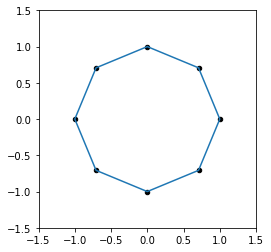

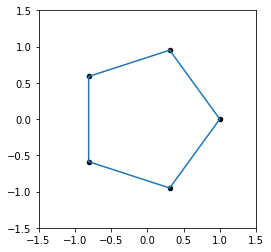

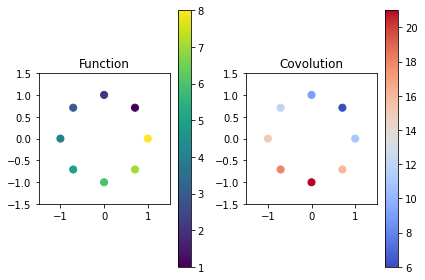

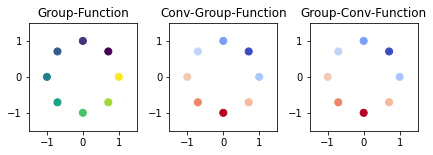

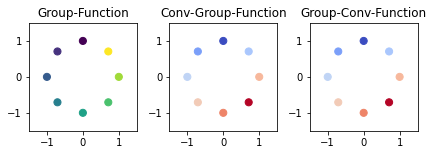

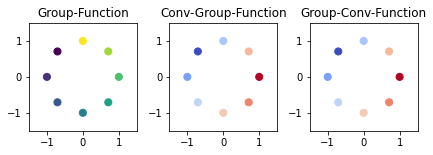

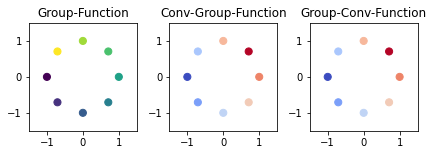

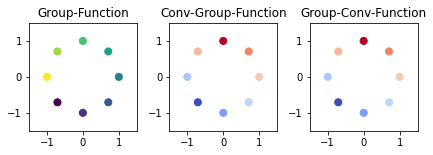

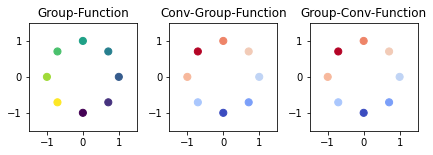

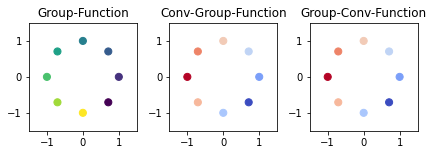

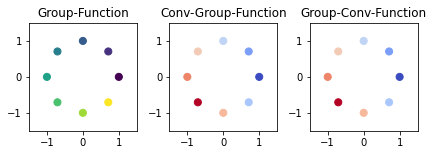

In [3]:
cyclic = Cn(8)
vertices = cyclic.show_polygon()
dihedral = Dn(5)
vertices = dihedral.show_polygon()

f = np.array([1,2,3,4,5,6,7,8])
k = np.array([1,1,1,0,0,0,0,0])
h = cyclic.convolve(f, k)

cyclic.check_equivariance(f,k)